# Lectura de Información

In [1047]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 


from sklearn.linear_model import LinearRegression
import seaborn as sns


## Lectura de los datos

In [1078]:

DATA_FOLDER = 'C:/Users/cristian.soto/Desktop/Varios/Coursera'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))


In [1079]:
transactions = transactions[transactions['item_cnt_day']>=0]

## primera visualización de las tablas cargadas

In [1080]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0


In [1081]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [1082]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [1083]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


## Unión de las bases que se consideran de mayor aporte

In [1084]:
transactions = pd.merge(transactions, items, how='left', on='item_id')
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58
2,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58
3,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
4,10.01.2013,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59


In [1085]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928493 entries, 0 to 2928492
Data columns (total 8 columns):
date                object
date_block_num      int64
shop_id             int64
item_id             int64
item_price          float64
item_cnt_day        float64
item_name           object
item_category_id    int64
dtypes: float64(2), int64(4), object(2)
memory usage: 201.1+ MB


## Extracción de variables de fecha que se considran relevantes

In [1086]:
transactions['date']= pd.to_datetime(transactions['date'], format='%d.%m.%Y')
transactions['Ano']= transactions['date'].dt.year 
transactions['Mes']= (pd.to_datetime(transactions['date'], format='%Y.%m.%d', errors="coerce").dt.month_name() )
#transactions['Ano']=transactions['Ano'].astype(str, copy=True)

In [1087]:
transactions.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,Ano
count,2.928493e+06,2.928493e+06,2.928493e+06,2.928493e+06,2.928493e+06,2.928493e+06,2.928493e+06
mean,1.456976e+01,3.300295e+01,1.020028e+04,8.894664e+02,1.248337e+00,4.001635e+01,2.013777e+03
std,9.422952e+00,1.622543e+01,6.324396e+03,1.727498e+03,2.619586e+00,1.709811e+01,7.684596e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00,2.013000e+03
25%,7.000000e+00,2.200000e+01,4.477000e+03,2.490000e+02,1.000000e+00,2.800000e+01,2.013000e+03
50%,1.400000e+01,3.100000e+01,9.355000e+03,3.990000e+02,1.000000e+00,4.000000e+01,2.014000e+03
75%,2.300000e+01,4.700000e+01,1.569100e+04,9.990000e+02,1.000000e+00,5.500000e+01,2.014000e+03
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01,2.015000e+03


In [1088]:
missing_data = transactions.isnull()
missing_data.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,Ano,Mes
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [1089]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

date
False    2928493
Name: date, dtype: int64

date_block_num
False    2928493
Name: date_block_num, dtype: int64

shop_id
False    2928493
Name: shop_id, dtype: int64

item_id
False    2928493
Name: item_id, dtype: int64

item_price
False    2928493
Name: item_price, dtype: int64

item_cnt_day
False    2928493
Name: item_cnt_day, dtype: int64

item_name
False    2928493
Name: item_name, dtype: int64

item_category_id
False    2928493
Name: item_category_id, dtype: int64

Ano
False    2928493
Name: Ano, dtype: int64

Mes
False    2928493
Name: Mes, dtype: int64



In [1090]:
 Cant_Mes = transactions.groupby('Mes')['item_cnt_day'].sum()

## Analisis del comportamiento de la cantidad de ventas

In [1091]:
transactions.set_index('date',inplace=True)

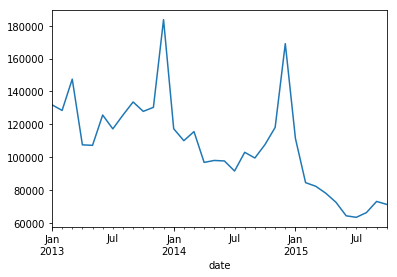

In [1092]:
transactions.groupby(pd.Grouper(freq='M'))['item_cnt_day'].sum().plot()

In [1093]:
transactions.reset_index(inplace=True)

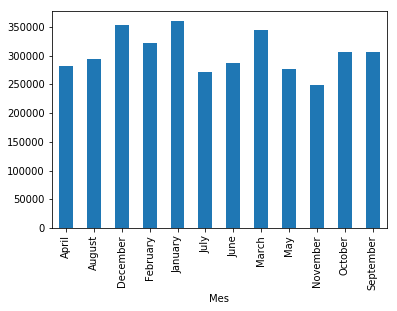

In [1094]:
Cant_Mes.plot(kind='bar')

In [1095]:
#plt.plot(transactions['Mes'], transactions['item_cnt_day'])

 Cant_Ano=transactions.groupby('Ano')['item_cnt_day'].sum()

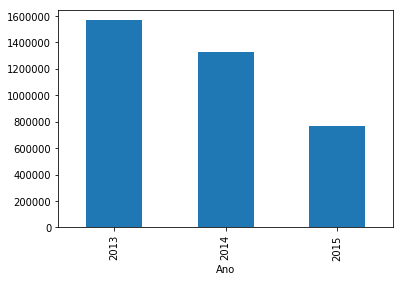

In [1096]:
Cant_Ano.plot(kind='bar')

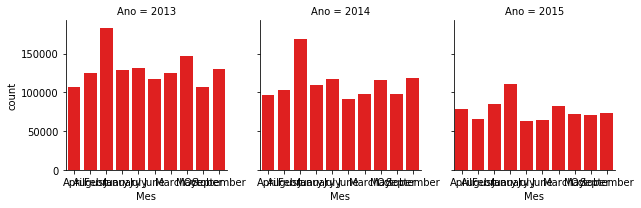

In [1097]:
Cant_ano_mes=transactions.groupby(['Ano','Mes']).agg({'item_cnt_day':'sum'}).rename(columns={'item_cnt_day':'count'}).reset_index()
g = sns.FacetGrid(Cant_ano_mes, col="Ano")
g.map(sns.barplot, "Mes",'count', color="r")

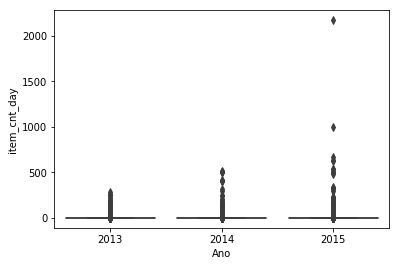

In [1098]:
sns.boxplot(x="Ano", y="item_cnt_day", data=transactions)

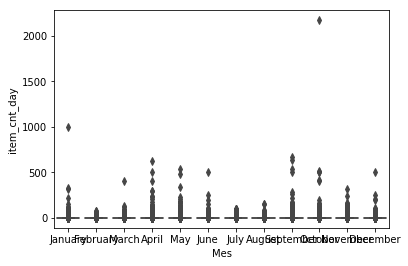

In [1099]:
sns.boxplot(x="Mes", y="item_cnt_day", data=transactions)

## Se evidencia un cambio del comportamiento de las cantidades vendidas dependiendo de la temporada y el año

In [1100]:
transactions[['item_cnt_day', 'item_price']].corr()

,item_cnt_day,item_price
item_cnt_day,1.000000,0.011937
item_price,0.011937,1.000000


In [1101]:
transactions['Mes_num'] = transactions['date'].dt.weekday

In [1102]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,Ano,Mes,Mes_num
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,2013,January,2
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,2013,January,3
2,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,2013,January,6
3,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,2013,January,1
4,2013-01-10,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,2013,January,3


In [1103]:
transactions['ganancias'] = transactions['item_price']*transactions['item_cnt_day']

In [1104]:
cantidad_mes = transactions.groupby(['date_block_num']).agg({'item_cnt_day':'sum','ganancias':'sum'}).rename(columns={'item_cnt_day':'cantidadmes','ganancias':'ganancias_mod'})
cantidad_mes

,cantidadmes,ganancias_mod
date_block_num,,
0,131850.0,9.239909e+07
1,128382.0,9.096449e+07
2,147438.0,1.052654e+08
3,107439.0,6.945713e+07
4,107148.0,6.525317e+07
5,125583.0,7.976249e+07
6,117165.0,6.953452e+07
7,125586.0,7.458699e+07
8,133551.0,1.193180e+08


In [1105]:
cantidad_mes['diferencia']=cantidad_mes['cantidadmes'].diff()
cantidad_mes.fillna(0, inplace=True)
cantidad_mes

,cantidadmes,ganancias_mod,diferencia
date_block_num,,,
0,131850.0,9.239909e+07,0.0
1,128382.0,9.096449e+07,-3468.0
2,147438.0,1.052654e+08,19056.0
3,107439.0,6.945713e+07,-39999.0
4,107148.0,6.525317e+07,-291.0
5,125583.0,7.976249e+07,18435.0
6,117165.0,6.953452e+07,-8418.0
7,125586.0,7.458699e+07,8421.0
8,133551.0,1.193180e+08,7965.0


In [1106]:
transactions = pd.merge(transactions, cantidad_mes, how='left', on='date_block_num')

In [1107]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928493 entries, 0 to 2928492
Data columns (total 15 columns):
date                datetime64[ns]
date_block_num      int64
shop_id             int64
item_id             int64
item_price          float64
item_cnt_day        float64
item_name           object
item_category_id    int64
Ano                 int64
Mes                 object
Mes_num             int64
ganancias           float64
cantidadmes         float64
ganancias_mod       float64
diferencia          float64
dtypes: datetime64[ns](1), float64(6), int64(6), object(2)
memory usage: 357.5+ MB


## Primero modelo para poder predecir la cantidad de items vendidos por mes


In [1269]:
X = transactions[['date_block_num','shop_id','item_id','item_price','item_category_id','Ano', 'Mes_num', 'ganancias_mod','diferencia' ]]
Y = transactions['item_cnt_day']

In [1270]:
from sklearn.model_selection import train_test_split

## División de los datos de entrenamiento y prueba

In [1271]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

print("tamaño de muestra de test :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


tamaño de muestra de test : 585699
number of training samples: 2342794


## por ley de parsimonia probando el modelo mas sencillo (modelo de regresión múltuple)

In [1272]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Metricas para evaluar el modelo de regresion multiple

### R^2

In [1112]:
lm.score(x_test, y_test)

0.0015487944698113765

### MSE - RMSE

In [30]:
from sklearn.metrics import mean_squared_error

In [32]:
Yhat=lm.predict(x_test)
mse = mean_squared_error(y_test, Yhat)
print('MSE: ', mse)
print('RMSE', np.sqrt(mean_squared_error(y_test, Yhat)) )

MSE:  12.699179250835975
RMSE 3.563590780495984


## Seleccion de variables usando el metodo Lasso

In [1130]:
#from sklearn.model_selection import cross_val_score
#import statsmodels.api as sm
#from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [1131]:
reg = LassoCV()
reg.fit(X, Y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,Y))
coef = pd.Series(reg.coef_, index = X.columns)



Best alpha using built-in LassoCV: 148605.763358
Best score using built-in LassoCV: 0.000207


In [1132]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 1 variables and eliminated the other 8 variables


## Segun el método Lasso para selección de variables solo se deben tener en cuenta las variables item_category_id, item_price y item_id

Text(0.5,1,'Feature importance using Lasso Model')

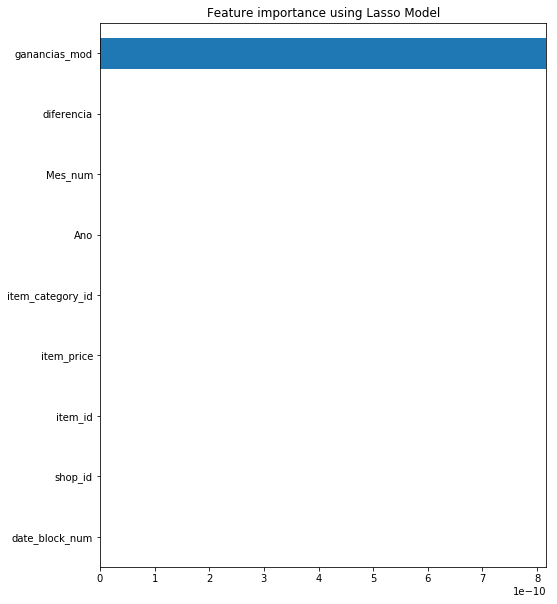

In [1133]:
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [1348]:
X_train = transactions[transactions.date_block_num < 33].drop(['item_cnt_day'], axis=1)
Y_train = transactions[transactions.date_block_num < 33]['item_cnt_day']
X_valid = transactions[transactions.date_block_num == 33].drop(['item_cnt_day'], axis=1)
Y_valid = transactions[transactions.date_block_num == 33]['item_cnt_day']

In [1349]:
x_train_2 = X_train[['date_block_num','shop_id','item_id','item_price','item_category_id','Ano', 'Mes_num', 'ganancias_mod','diferencia' ]]
y_train_2 = Y_train


x_test_2 = X_valid[['date_block_num','shop_id','item_id','item_price','item_category_id','Ano', 'Mes_num', 'ganancias_mod','diferencia' ]]
y_test_2= Y_valid




In [991]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_2, Y_2, test_size=0.10, random_state=1)

print("tamaño de muestra de test :", x_test_2.shape[0])
print("number of training samples:",x_train_2.shape[0])


tamaño de muestra de test : 293585
number of training samples: 2642264


In [504]:
x_train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348679 entries, 1912632 to 128037
Data columns (total 5 columns):
item_id             int64
item_price          float64
item_category_id    object
shop_id             int64
date_block_num      object
dtypes: float64(1), int64(2), object(2)
memory usage: 107.5+ MB


In [1211]:
lm = LinearRegression()
lm.fit(X_2, Y_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
R2 = lm.score(x_test_2, y_test_2)
Yhat=lm.predict(x_test_2)
mse = mean_squared_error(y_test_2, Yhat)
print('MSE: ', mse)
print('RMSE', np.sqrt(mean_squared_error(y_test_2, Yhat)) )
print('R2',R2 )

MSE:  12.702144786373966
RMSE 3.5640068443219866
R2 0.00027144697392267325


## Al no tener buenos resultados con los modelos de regresión multiple se procede a modelar con un modelo de regresion Random Forest

## Regresión Random Forest

In [1183]:
from sklearn.ensemble import RandomForestRegressor


In [1282]:
#https://www.feedingthemachine.cl/random-forest-en-regresion-para-machine-learning/
model = RandomForestRegressor().fit(x_train,y_train)
pred = model.predict(x_train)
pred


array([1.        , 1.09      , 1.17145238, ..., 1.        , 1.01      ,
       1.        ])

In [509]:
from sklearn import metrics

In [1369]:
print('MSE', metrics.mean_squared_error(y_train,pred))
print('MAE', metrics.mean_absolute_error(y_train,pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_train,pred)))
print('R2', model.score(x_train,y_train))

MSE 1.5946993290521867
MAE 0.14124515284282832
RMSE 1.2628140516529687
R2 0.788676196637794


In [1283]:
%%time
pred_test = model.predict(x_test)
pred_test

Wall time: 25.7 s


array([1.06  , 1.02  , 1.    , ..., 1.22  , 1.2725, 1.    ])

In [126]:
pred_test.shape

(587170,)

In [127]:
x_test.shape

(587170, 7)

In [237]:
%%time
print('MSE', metrics.mean_squared_error(y_test,pred_test))
print('MAE', metrics.mean_absolute_error(y_test,pred_test))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
print('R2', model.score(x_test,y_test))

MSE 3.5610169202550677
MAE 0.2891762897577438
RMSE 1.8870656904980991
R2 0.1369717495065601
Wall time: 22.9 s


## Random Forest con otro conjunto de variables depurado

In [1219]:
%%time
model_2 = RandomForestRegressor().fit(X_2,Y_2)



Wall time: 6min 11s


In [1284]:
pred_2 = model_2.predict(X_2)
pred_2

array([131850., 131850., 131850., ...,  72989.,  72989.,  72989.])

In [512]:
pred_2_test = model_2.predict(x_test_2)


In [335]:
pred_2_test.shape

(585699,)

In [139]:
x_test_2.head()

,item_id,item_price,item_category_id,shop_id
651498,11691,149.0,40,37
460637,4302,649.0,56,25
1696749,1306,299.0,55,47
1081839,11645,149.0,37,18
1865398,19050,549.0,55,21


## Metricas de mi modelo final

In [513]:
print('MSE', metrics.mean_squared_error(y_train_2,pred_2))
print('MAE', metrics.mean_absolute_error(y_train_2,pred_2))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_train_2,pred_2)))
print('R2', model_2.score(x_train_2,y_train_2))

MSE 1.873510966080804
MAE 0.20281810087781935
RMSE 1.3687625674604065
R2 0.6528262692396808


In [337]:
%%time
print('MSE', metrics.mean_squared_error(y_test_2,pred_2_test))
print('MAE', metrics.mean_absolute_error(y_test_2,pred_2_test))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test_2,pred_2_test)))
print('R2', model_2.score(x_test_2,y_test_2))

MSE 3.0606721790743476
MAE 0.2894702736857942
RMSE 1.7494776875040012
R2 0.25823251751039766
Wall time: 1min 54s


In [472]:
from xgboost import XGBRegressor

In [ ]:
model_3 = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

In [1350]:
model_3 = XGBRegressor()

model_3.fit(
    x_train_2, 
    y_train_2, 
    eval_metric="rmse", 
    eval_set=[(x_train_2, y_train_2), (x_test_2, y_test_2)], 
    verbose=True, 
    early_stopping_rounds = 10)

[0]	validation_0-rmse:2.23287	validation_1-rmse:9.79016
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:2.14696	validation_1-rmse:9.78006
[2]	validation_0-rmse:2.09752	validation_1-rmse:9.77318
[3]	validation_0-rmse:2.06083	validation_1-rmse:9.77026
[4]	validation_0-rmse:2.02102	validation_1-rmse:9.76840
[5]	validation_0-rmse:2.00710	validation_1-rmse:9.76580
[6]	validation_0-rmse:1.99950	validation_1-rmse:9.76489
[7]	validation_0-rmse:1.98622	validation_1-rmse:9.76537
[8]	validation_0-rmse:1.97741	validation_1-rmse:9.76499
[9]	validation_0-rmse:1.96612	validation_1-rmse:9.76121
[10]	validation_0-rmse:1.94415	validation_1-rmse:9.76119
[11]	validation_0-rmse:1.94142	validation_1-rmse:9.76089
[12]	validation_0-rmse:1.93567	validation_1-rmse:9.75500
[13]	validation_0-rmse:1.92073	validation_1-rmse:9.75492
[14]	validation_0-rmse:1.91113	validation_1-rmse:9.75

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [1367]:
pred_3 = model_3.predict(x_train_2).clip(0,5)

In [1368]:
print('MSE', metrics.mean_squared_error(y_train_2,pred_3))
print('MAE', metrics.mean_absolute_error(y_train_2,pred_3))
print('RMSE', np.sqrt(metrics.mean_absolute_error(y_train_2,pred_3)))
print('R2', model_3.score(x_train_2,y_train_2))

MSE 4.7188492009326435
MAE 0.34253087725308595
RMSE 0.5852613751590703
R2 0.35237434092094855


## Carga de base de datos a predecir

In [1333]:
test   = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv'))
transactions_orig   = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv'))

In [1334]:
test_1 = pd.merge(test, items, how='left', on='item_id')


In [1335]:
transactions_orig = transactions_orig.groupby(['item_id','shop_id']).agg({'item_price':'min'})


In [1336]:
test_2 = pd.merge(test_1, transactions_orig, how="left", left_on=['item_id','shop_id'], right_on=['item_id','shop_id'])
test_2.fillna(0, inplace=True)

In [1337]:
x_train_2.tail()

,date_block_num,shop_id,item_id,item_price,item_category_id,Ano,Mes_num,ganancias_mod,diferencia
2875102,32,25,21022,1799.0,61,2015,6,9.318504e+07,6793.0
2875103,32,25,21105,1799.0,61,2015,5,9.318504e+07,6793.0
2875104,32,25,21088,1299.0,61,2015,2,9.318504e+07,6793.0
2875105,32,25,20990,1299.0,61,2015,1,9.318504e+07,6793.0
2875106,32,25,20303,399.0,40,2015,4,9.318504e+07,6793.0


In [1351]:
test_final = test_2[['item_id','item_price','item_category_id','shop_id']]
#test_final['item_price']=round(test_final['item_price'])
test_final['date_block_num']= 34
test_final['Mes_num'] = 11
test_final['Ano'] = 2013
test_final['diferencia'] = -1805
test_final['ganancias_mod'] = 84630164

test_final= test_final[['date_block_num','shop_id','item_id','item_price','item_category_id','Ano','Mes_num','ganancias_mod','diferencia']]
test_final.head()

C:\Users\cristian.soto\.conda\envs\Libranza\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date_block_num,shop_id,item_id,item_price,item_category_id,Ano,Mes_num,ganancias_mod,diferencia
0,34,5,5037,749.0,19,2013,11,84630164,-1805
1,34,5,5320,0.0,55,2013,11,84630164,-1805
2,34,5,5233,599.0,19,2013,11,84630164,-1805
3,34,5,5232,599.0,23,2013,11,84630164,-1805
4,34,5,5268,0.0,20,2013,11,84630164,-1805


In [1359]:
%%time
pred_final = model_3.predict(test_final).clip(0,5)

Wall time: 136 ms


In [1360]:
pred_final

array([1.107591  , 0.8825331 , 1.107591  , ..., 0.99604744, 1.2447588 ,
       1.074224  ], dtype=float32)

In [1361]:
import math

In [1362]:
pred_final = pd.DataFrame(pred_final).rename(columns={0:'item_cnt_month'})


In [1363]:
pred_final['item_cnt_month'] = pred_final['item_cnt_month'].apply(lambda x: math.floor(x))

In [1364]:
pred_final=pred_final.reset_index().rename(columns={'index':'ID'})

In [1370]:
Prediccion_Final= pd.merge(test_final, pred_final,left_index=True, right_index=True)


In [1326]:
Prediccion_Final = Prediccion_Final[['ID','item_cnt_month']]


In [1268]:
pred_final.to_csv('mi_prediccion.csv', index=False)
